In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Câu hỏi 1: Sự thay đổi của Attributes và nơi ở như thế nào?

- Sự thay đổi của Attributes theo continent
- Sự thay đổi của Attributes theo Subcontinent
- Sự thay đổi của Attributes theo biome

Ý nghĩa: Biết được cách sinh sống, các thuộc tính của động vật theo nơi ở thì sẽ giúp ích cho việc tìm kiếm, chăm sóc, theo dõi, săn bắt động vật dễ dàng hơn. Hoặc là khi con người đến một nơi nào đó, có thể tham khảo các thuộc tính này của động vật để áp dụng cho mình

Nguồn cảm hứng: Đã từng thấy trên ti vi nhiều sinh vật ở sa mạc có thói quen sống về đêm, thấy lạc đà phải có khả năng trữ nước, nên tự hỏi là các thuộc tính của động vật thay đổi như thế nào nếu chúng ở các nơi khác nhau

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)

/tmp/ipykernel_349/2748818031.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)


In [3]:
data_df.head(5)

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,Population size,Life span,Top speed,Weight,Height,Length,Biome,Climate,Mating behavior,Reproduction season,Pregnancy duration,Baby carrying,Independent age,Female name,Male name,Baby name,Incubation period,Population trend,Population status,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Seasonal behavior,BC_min,BC_max
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,"400,000",15.0,75.0,38.0,0.825,1.325,"['Wetlands ', 'Shrubland', 'Forest', 'Mountain...","['Temperate', 'Cold', 'Polar', 'Tropical']",Monogamy,January-April,60-63 days,1-14 pups,45 days,bitch,dog,"pup, whelp",NaN,Stable,Least concern (LC),"['Nocturnal', 'Carnivore', 'Scavenger', 'Terre...","['Asia', ' Europe', ' North America', ' Africa']","['South Asia', ' Western Asia', ' Southeast As...","['Albania', ' Armenia', ' Azerbaijan', ' Belar...","['Czech Republic', ' Estonia', ' Finland', ' F...","['Nearctic', ' Palearctic', ' Indomalayan', ' ...","['pack', ' route', ' rout']","['Carnivore', '', 'Scavenger']",['Greenland'],"['Terrestrial', ' Cursorial', ' Altricial', ' ...",['Not a migrant'],1.0,14.0
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,"2,154-3,159",12.5,96.0,185.5,NaN,2.950,"['Forest', 'Rainforest', 'Montane forest', 'Ri...","['Tropical', 'Temperate']",Polygyny,November-April,103 days,1-7 cubs,18 mos-3 yrs,NaN,NaN,cub,NaN,Decreasing,Endangered (EN),"['Nocturnal', 'Carnivore', 'Cursorial', 'Terre...",['Asia'],"['South Asia', ' Southeast Asia', ' East Asia']","['Bangladesh', ' Bhutan', ' China', '', ' Indi...",['Thailand'],"['Palearctic', ' Indomalayan']",[],['Carnivore'],"['Tibet', ' Yunnan']","['Cursorial', ' Terrestrial', ' Ambush predato...",['Not a migrant'],1.0,7.0
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,"200,000",35.0,56.0,367.5,1.115,2.100,"['Forest', 'Woodland']","['Temperate', 'Cold', 'Polar']","Polygynandry,",May-July,8 weeks,1-4 cubs,2-4 years,sow,boar,cub,NaN,Stable,Least concern (LC),"['Crepuscular', 'Omnivore', 'Terrestrial', 'Al...","['Asia', ' Europe', ' North America']","['South Asia', ' Western Asia', ' East Asia', ...","['Albania', ' Armenia', ' Austria', ' Azerbaij...",[],"['Nearctic', ' Palearctic', ' Indomalayan']","['sloth', ' sleuth']",['Omnivore'],"['Estonia', ' Finland', ' France', ' Georgia',...","['Terrestrial', ' Altricial', ' Nomadic', ' Te...","['Hibernating', ' Migrating']",1.0,4.0
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,10-25 Thou,85.0,20.0,130000.0,NaN,27.500,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Monogamy,winter or early spring,1 year,1 calf,8 months,cow,bull,calf,NaN,Increasing,Endangered (EN),"['Carnivore', 'Piscivores', 'Aquatic', 'Precoc...","['Africa', ' South America', ' Oceania', ' Nor...","['Sub-Saharan Africa', ' Caribbean Islands', '...","['Angola', ' Argentina', ' Australia', ' Baham...","['Chile', ' China', ' Colombia', ' Comoros', '...",[],"['pod', ' gam', ' herd', ' school', ' mod']","['Carnivore', '', 'Piscivores']","['Atlantic Ocean', ' Pacific Ocean']","['Aquatic', ' Precocial', ' Natatorial', ' Viv...",['Migrating'],1.0,NaN
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,"50,000",65.0,45.0,4500.0,NaN,7.500,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Polygynandry,"year-round, usually in summer",15-18 months,1 calf,2 years,cow,bull,calf,NaN,NaN,Data deficient (DD),"['Diurnal', 'Carnivore', 'Aquatic', 'Precocial...","['Africa', ' Oceania', ' Antarctica', ' North ...","['North Africa', ' Caribbean Islands', ' South...","['Algeria', ' Antigua', 'Barbuda', ' Argentina...","['Br

Chuyển các cột nên có dạng list sang kiểu list

In [4]:
def to_list(x):
    if pd.isna(x): 
        return []
    x = literal_eval(x)
    x = [st.strip() for st in x if st != '']
    return x

In [5]:
#Chỉ quan tâm những cột có liên quan đến câu hỏi
list_columns = ['Lifestyle', 'Diet', 'Climate', 'Continents', 'Subcontinents', 'Biome', 'Attributes']
for column in list_columns:
    data_df[column] = data_df[column].apply(to_list)


Xem thử 1 với mỗi cột dạng list thì có những giá trị nào:

In [6]:
def list_column_view(col):
    count = pd.Series(data_df.explode(col).groupby([col]).size().sort_values(ascending=False))
    total = data_df[col].apply(lambda x: 0 if len(x) == 0 else 1).sum() # Tổng số động vật mà list attributes khác rỗng
    return pd.DataFrame(data = {'count': count, 'ratio': (count / total * 100).round(2)})

In [7]:
#list_column_view('Diet')
#list_column_view('Lifestyle')
#list_column_view('Subcontinents')
#list_column_view('Continents')
#list_column_view('Biome')
#list_column_view('Climate')
list_column_view('Attributes')

,count,ratio
Attributes,,
starts with,28525,100.00
Terrestrial,21615,75.78
Not a migrant,10751,37.69
Social,2277,7.98
Migrating,1936,6.79
Diurnal,1665,5.84
Carnivore,1495,5.24
Nocturnal,1271,4.46
Congregatory,1225,4.29


Vì có quá nhiều thuộc tính, nên ta chọn các thuộc tính sau (các thuôc tính liên quan nhau thì đặt gần nhau):

Ta quan tâm 14 thuộc tính được chia làm 6 nhóm
- Social (sống theo bầy đàn) và Solitary (đơn độc)
- Diurnal (sống ban ngày) và Nocturnal (sống ban đêm)
- Carnivore (ăn thịt), Hebivore (ăn lá), Insectivores (ăn côn trùng), Omnivore (ăn tạp)
- Migrating (động vật di cư)
- Precocial (mới đẻ ra cần chăm sóc) và Altricial (mới đẻ ra có thể tự đi lại) (Thường cho lớp chim)
- Nomadci (du mục), Arboreal( sống trên cây) và Territorial (Lãnh thổ)

Ta lập bảng xem đối với mỗi thuộc tính X và mỗi địa điểm Y thì động vật ở địa điểm Y có bao nhiêu % là có thuộc tính X. Như vậy, khi đối chiếu theo hàng dọc thì sẽ biết được sự khác nhau của cùng 1 thuộc tính giữa các địa điểm, khi đối chiếu theo hàng ngang thì biết được sự khác nhau giữa các thuộc tính trong cùng 1 khu vực. Sau đó dùng Heatmap để minh họa cho bảng này

In [8]:
attributes = ['Social', 'Solitary', 'Diurnal', 'Nocturnal', 'Carnivore', 'Herbivore','Insectivores', 'Omnivore', 
               'Migrating', 'Precocial', 'Altricial', 'Nomadic', 'Arboreal', 'Territorial']

In [9]:
#Vì chỉ xét các attributes ở trên nên loại bớt các attributes không có
ques1_df = data_df.explode('Attributes')
ques1_df = ques1_df[ques1_df['Attributes'].isin(attributes)]
#ques1_df.head(100)

In [10]:
def explode_by(col, num_row):
    #Chỉ lấy num_row dòng
    attributes_explode = ques1_df.explode(col)
    rows = attributes_explode.groupby(col).size().sort_values(ascending = False).index[:num_row]
    attributes_explode = attributes_explode[attributes_explode[col].isin(rows)]

    # Tính số động vật của mỗi loại trong col
    col_count = attributes_explode.drop_duplicates(subset = ['Name', col]).groupby(col).size()
   # return col_count
    # Bảng đếm số lượng động vật của mỗi loại trong col ứng với mỗi attributes
    attributes_explode = attributes_explode.groupby([col, 'Attributes']).size()
    attributes_explode= attributes_explode.unstack()
    #Tính % của mỗi attribute trong mỗi loại trong col
    attributes_explode = (attributes_explode.loc[:,"Altricial":"Territorial"].div(col_count, axis=0)*100).round(1)
    
    sns.heatmap(attributes_explode)
    return attributes_explode

    

### Sự thay đổi của attributes theo Continent

Attributes,Altricial,Arboreal,Carnivore,Diurnal,Herbivore,Insectivores,Migrating,Nocturnal,Nomadic,Omnivore,Precocial,Social,Solitary,Territorial
Continents,,,,,,,,,,,,,,
Africa,24.2,26.3,38.4,43.5,23.4,15.4,37.9,26.3,9.9,12.8,20.7,62.1,18.5,25.1
Antarctica,7.4,NaN,56.4,38.3,NaN,2.1,81.9,12.8,13.8,1.1,38.3,76.6,5.3,16.0
Asia,23.5,25.7,38.3,41.7,25.3,13.9,40.0,27.6,8.0,13.2,21.6,53.4,24.3,22.8
Europe,28.8,20.8,45.7,46.7,17.2,17.4,58.0,20.1,5.9,12.2,22.4,55.7,18.8,25.0
North America,25.6,26.3,44.6,48.8,20.2,21.2,44.8,24.1,5.9,15.7,21.2,47.5,26.1,27.1
Oceania,49.5,32.9,57.5,50.2,27.9,15.6,22.9,47.2,12.6,15.0,37.5,58.1,33.6,27.6
South America,14.9,23.7,34.0,33.4,14.7,15.2,52.0,19.0,6.2,11.1,14.5,48.1,17.6,18.8


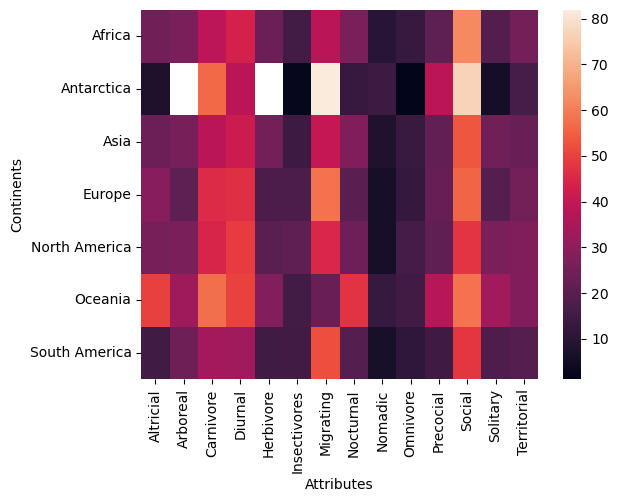

In [11]:
table = explode_by('Continents', 7)
table

Một số nhận xét:
- Ở Châu Nam Cực không có đông vật sống trên cây và động vật ăn thực vật (do điều kiện khắc nghiệt không có nhiều thực vật)
- Ở Nam Cực đa số động vật đều di cư, tỷ lệ di cư rất cao (tìm nơi ấm hơn, nguồn thức ăn thay đổi,.. tóm lại là do điều kiện nam cực rất khắc nghiệt)
- Nhìn chung thì tỷ lệ sống theo bầy đàn sẽ cao hơn sống đơn độc, đối với mọi nơi tỷ lệ này không khác nhau lắm nhưng đối với Nam Cực thì sống đơn độc cực kỳ thấp, hầu hết sống bầy đàn (để tăng nhiệt độ). 
- Về thức ăn, đa số các nơi tỷ lệ ăn thịt nhiều hơn ăn thực vật, ăn tạp, côn trùng, tỷ lệ này không khác nhau đối với các nơi, ngoài trừ châu Nam Cực.
- Nhìn chung tỷ lệ sống ban ngày ở mọi nơi đều sẽ cao hơn sống vào ban đêm, ở mọi nơi thì tỷ lệ này không khác nhau là mấy.

Như vậy, ngoại trừ một số nơi đặc biệt như là châu Nam Cực sẽ ảnh hưởng đến 1 số thuộc tính, còn lại các thuộc tính của động vật sẽ có thay đổi chênh lệch nhưng không quá nhiều giữa các châu

### Sự thay đổi của attributes theo Subcontinents

Attributes,Altricial,Arboreal,Carnivore,Diurnal,Herbivore,Insectivores,Migrating,Nocturnal,Nomadic,Omnivore,Precocial,Social,Solitary,Territorial
Subcontinents,,,,,,,,,,,,,,
Caribbean Islands,52.4,42.2,69.0,80.7,21.9,27.3,58.3,19.8,8.6,18.7,42.2,65.8,20.9,40.1
Central America,55.9,54.1,66.2,72.2,23.1,26.0,43.4,28.8,5.3,21.4,35.2,58.0,28.8,36.7
Central Asia,59.4,39.6,56.4,70.8,31.2,21.8,40.1,28.7,11.4,23.8,29.2,60.9,29.7,36.6
East Asia,44.9,31.4,57.5,64.3,30.5,16.3,35.7,33.5,12.0,20.3,43.1,62.2,29.5,34.5
North Africa,54.7,36.0,66.0,68.0,22.2,20.2,40.4,28.6,10.3,19.2,36.9,65.0,23.6,36.5
South Asia,45.5,35.5,57.6,65.9,27.2,16.2,26.9,33.8,11.0,21.0,39.3,60.7,32.8,34.8
Southeast Asia,43.5,44.4,53.5,60.0,29.7,16.5,20.9,40.0,10.0,20.0,36.2,56.8,35.6,27.4
Sub-Saharan Africa,41.7,34.6,47.6,65.4,37.3,12.7,22.2,33.7,12.9,18.8,41.2,70.5,23.7,34.4
Western Asia,55.4,34.6,64.3,67.3,23.4,21.2,34.6,32.3,8.9,20.4,34.6,58.7,30.5,37.5


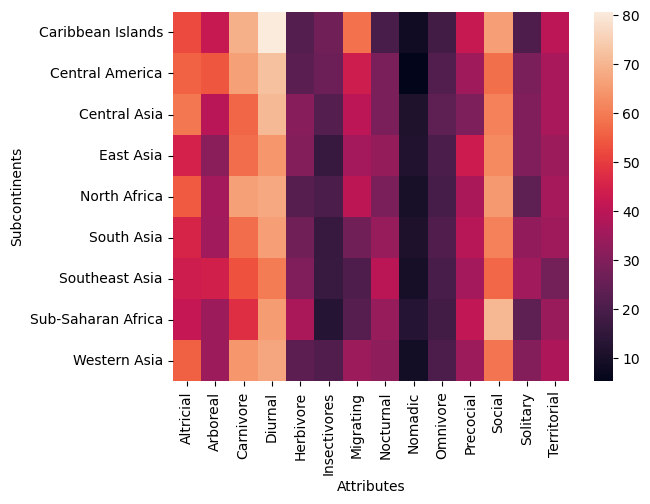

In [12]:
table = explode_by('Subcontinents', 9)
table

Một số nhận xét:
- Sự thay đổi của subcontinent không khác mấy so với sự thay đổi của continent. Hầu hết sự khác nhau giữa các vùng miền là không nhiều (cùng cột thì màu sắc không khác nhau nhiều)

### Sự thay đổi của attributes theo biome

Attributes,Altricial,Arboreal,Carnivore,Diurnal,Herbivore,Insectivores,Migrating,Nocturnal,Nomadic,Omnivore,Precocial,Social,Solitary,Territorial
Biome,,,,,,,,,,,,,,
Agricultural,35.8,43.3,45.5,58.5,38.0,28.1,19.8,38.2,8.6,24.6,19.8,46.7,39.2,44.0
Anthropogenic biome,18.8,24.5,28.5,33.6,20.8,17.5,43.2,24.9,6.8,14.0,11.0,40.5,22.5,20.4
Coastal,14.5,8.8,46.5,41.4,8.6,8.1,54.5,16.9,6.8,8.8,24.3,73.3,14.3,21.0
Forest,20.4,31.1,30.7,34.6,25.7,18.5,32.1,31.4,7.5,13.9,11.1,37.6,27.7,21.9
Freshwater,8.7,7.2,29.3,27.2,6.8,13.8,55.5,12.4,4.9,7.3,13.2,55.5,13.8,13.1
Grassland,19.0,15.0,29.8,36.2,24.9,16.3,39.7,27.0,7.8,12.8,14.8,45.2,25.5,22.0
Intertidal zone,15.7,8.8,41.1,37.7,7.7,7.5,61.4,13.2,4.0,6.8,23.2,73.1,13.3,18.3
Marine,8.9,3.7,38.9,30.8,3.5,4.8,66.0,9.8,6.6,4.8,20.5,79.1,7.0,12.7
Mountains,32.1,34.5,42.7,51.3,41.6,23.7,12.2,44.3,8.6,18.9,17.9,43.9,41.6,39.1


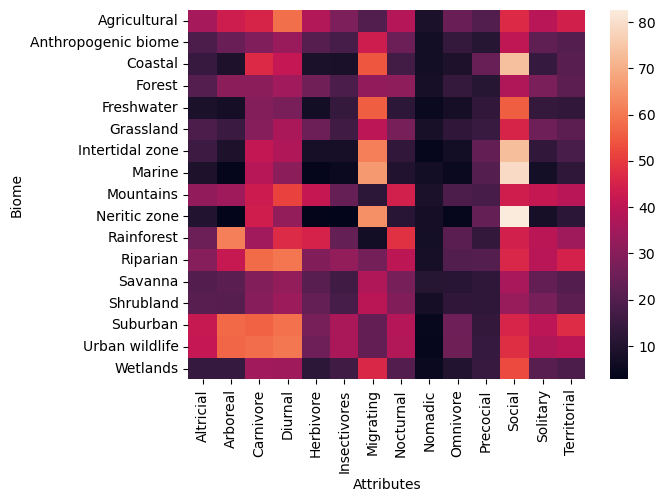

In [13]:
table = explode_by('Biome', 17)
table

Một số nhận xét:
- Những nơi ở biển như intertidal zone (khu bãi triều), Marine (biển), Neritic zone , oceanic pelagic zone (đại dương), coastal (duyên hải) thì xu hướng sống theo bầy đàn cao hơn.
- Ở rừng mưa và núi thì tỷ lệ di cư rất ít. Tại vì địa hình này phù hợp để dễ dàng xây tổ, xây hang


### Tổng kết câu hỏi 1:

Các thuộc tính của động vật không bị ảnh hưởng nhiều bởi những nơi khác nhau nhưng có môt số nơi có điều kiện đặc biệt sẽ ảnh hưởng đến một số yếu tố nhất định (như châu nam cực). Khi đến một nơi nào đó, có thể áp dụng điều kiện đặc biệt của nơi đó để suy luận ra một số thông tin về động vật. Nhưng nhìn chung, không nên sử dụng thông tin về nơi ở của động vật để suy ra các thuộc tính của động vật đó.